## Build and Test API with dummy model

In [9]:
from electricity_price_predictor.data import get_all, get_weather
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib

Load data

In [6]:
df = get_all()

### Features and target defined

In [7]:
train = df.iloc[:-1]
test = df.iloc[-1:]

In [8]:
X_train = train.drop('price', axis=1)
y_train = train.price.values

X_test = test.drop('price', axis=1)
y_test = test.price.values

### Model

In [9]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('estimator', LinearRegression())
])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', LinearRegression())])

In [11]:
pipe.predict(X_test)

array([27.55633669])

#### Save model

Model saved

In [12]:
#model_name = '../test_model.joblib'
#joblib.dump(pipe, model_name)

Test set saved

In [17]:
#dummy_test = '../test_testset.joblib'
#joblib.dump(X_test, dummy_test)

## App api

In [1]:
from flask import Flask, escape, request
app = Flask(__name__)

In [2]:
@app.route('/')
def hello():
    # get param from http://127.0.0.1:5000/?name=value
    name = request.args.get("name", "World")
    return f'Hello, {escape(name)}!'

In [25]:
@app.route('/predict_day_ahead')
def day_head():
    test = joblib.load('../test_testset.joblib')

    model = joblib.load('../test_model.joblib')
    pred = model.predict(test)[0]
    
    return {'test_values': test, 'day-ahead prediction': pred}

array([datetime.date(2020, 11, 18)], dtype=object)

27.556336686450823

In [14]:
X_test

,load,temp,feels_like,humidity,clouds_all,wind_speed,total_prod,wind_prod,wind_share,holiday
2020-11-18 11:00:00,3131.0,11.666766,6.851161,93.254343,85.390839,7.185988,3427.818226,2947.974034,0.860015,0.0


In [32]:
import streamlit as st

In [33]:
import numpy as np
import pandas as pd

st.markdown("""# This is a header
## This is a sub header
This is text""")

df = pd.DataFrame({
          'first column': list(range(1, 11)),
          'second column': np.arange(10, 101, 10)
        })

# this slider allows the user to select a number of lines
# to display in the dataframe
# the selected value is returned by st.slider
line_count = st.slider('Select a line count', 1, 10, 3)

# and used in order to select the displayed lines
head_df = df.head(line_count)

head_df

,first column,second column
0,1,10
1,2,20
2,3,30


In [1]:
from electricity_price_predictor.data import get_weather

In [ ]:
def get_weather(path='../raw_data/weather_2015_2020.csv'):
    df = pd.read_csv(path)

    df['dt'] = pd.to_datetime(df.dt)

    # drop unnecessary columns
    to_drop = ['dt_iso','timezone','lat', 'lon','sea_level','grnd_level',
               'rain_1h','rain_3h', 'pressure', 'snow_1h', 'snow_3h',
               'temp_min','temp_max','weather_id', 'weather_description',
               'weather_icon', 'wind_deg']
    df = df.drop(to_drop, axis=1)

    # population of each city in the df
    pop = {'Aarhus': 349_983,
        'Odense': 204_895,
        'Aalborg': 217_075,
        'Esbjerg': 115_748,
        'Vejle': 111_743,
        'Randers': 96_559,
        'Viborg': 93_819,
        'Kolding': 89_412,
        'Silkeborg': 89_328,
        'Herning': 86_348,
        'Horsens': 83_598}

    df['population'] = [pop[city] for city in df.city_name]

    # numeric weather values as affects demand or supply
    numeric_cols = ['temp', 'feels_like', 'humidity',  'clouds_all','wind_speed']

    weather_df = pd.DataFrame()

    #for the numeric columns, group by datetime and average according to their population weight
    for col in numeric_cols:
    #group by the datecolumn for each element in the column average it by it's weight
        weather_df[col] = df.groupby(df.dt).apply(lambda x : np.average(x[col], weights=x.population))

    # check for missing indices
    missing_idx = pd.date_range(start = '2015-01-01', end = '2020-11-24', freq='H' ).difference(weather_df.index)

    # impute missing indices with average of bounding rows
    for idx in missing_idx:
        weather_df.loc[idx] = weather_df.loc[pd.to_datetime(idx) - timedelta(hours= 1)] + \
                      weather_df.loc[pd.to_datetime(idx) + timedelta(hours= 1)] / 2

    weather_df = weather_df.sort_index()

    return weather_df

In [2]:
weather = get_weather()

In [3]:
weather

,temp,feels_like,humidity,clouds_all,wind_speed
dt,,,,,
2015-01-01 00:00:00,5.432478,-0.154827,86.758700,83.913979,5.937703
2015-01-01 01:00:00,5.488014,0.354168,87.139723,91.950524,5.322343
2015-01-01 02:00:00,5.599633,0.307204,87.786899,89.471946,5.605773
2015-01-01 03:00:00,6.234380,0.991530,87.241639,88.896068,5.681109
2015-01-01 04:00:00,6.305504,1.011242,88.078906,92.107249,5.809829
...,...,...,...,...,...
2020-11-24 19:00:00,9.668990,6.424743,91.838936,25.753311,4.114354
2020-11-24 20:00:00,9.572480,6.469465,91.755059,9.988330,3.873568
2020-11-24 21:00:00,9.470660,6.446793,92.304427,98.077469,3.756631


In [1]:
!pwd

/c/Users/cezea/code/Guli-Y/electricity_price_predictor/notebooks


In [2]:
from electricity_price_predictor.data import get_all

In [3]:
df = get_all()

In [4]:
df.head()

,price,load,temp,feels_like,humidity,clouds_all,wind_speed,total_prod,wind_prod,wind_share,holiday
2015-01-01 11:00:00,16.08,2194.0,6.732469,-0.346708,93.413145,91.036933,8.724397,3909.281833,3183.801317,0.814421,1.0
2015-01-02 11:00:00,15.08,2673.0,6.849566,-2.364317,80.994869,52.392560,11.233930,4247.975683,3405.313993,0.801632,0.0
2015-01-03 11:00:00,22.31,2405.0,4.332541,-1.562728,88.760764,38.333790,6.187115,3391.054053,2380.964290,0.702131,0.0
2015-01-04 11:00:00,27.32,2383.0,3.296271,-2.594814,79.233305,11.509847,5.591671,3606.491107,2268.581247,0.629027,0.0
2015-01-05 11:00:00,40.97,3099.0,4.498201,1.665528,93.718424,88.775936,2.044551,2175.075494,234.576723,0.107848,0.0


In [5]:
X = df.price.values

In [6]:
y = df.wind_prod.values

In [14]:
import matplotlib.pyplot as plt

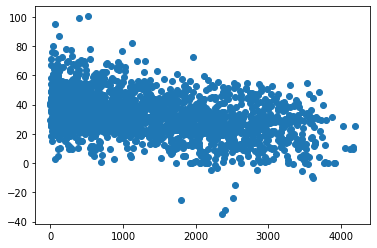

In [17]:
plt.scatter(y, X)

In [10]:
df = get_weather()

In [18]:
df

,temp,feels_like,humidity,clouds_all,wind_speed
dt,,,,,
2015-01-01 00:00:00,5.432478,-0.154827,86.758700,83.913979,5.937703
2015-01-01 01:00:00,5.488014,0.354168,87.139723,91.950524,5.322343
2015-01-01 02:00:00,5.599633,0.307204,87.786899,89.471946,5.605773
2015-01-01 03:00:00,6.234380,0.991530,87.241639,88.896068,5.681109
2015-01-01 04:00:00,6.305504,1.011242,88.078906,92.107249,5.809829
...,...,...,...,...,...
2020-11-24 19:00:00,9.668990,6.424743,91.838936,25.753311,4.114354
2020-11-24 20:00:00,9.572480,6.469465,91.755059,9.988330,3.873568
2020-11-24 21:00:00,9.470660,6.446793,92.304427,98.077469,3.756631
